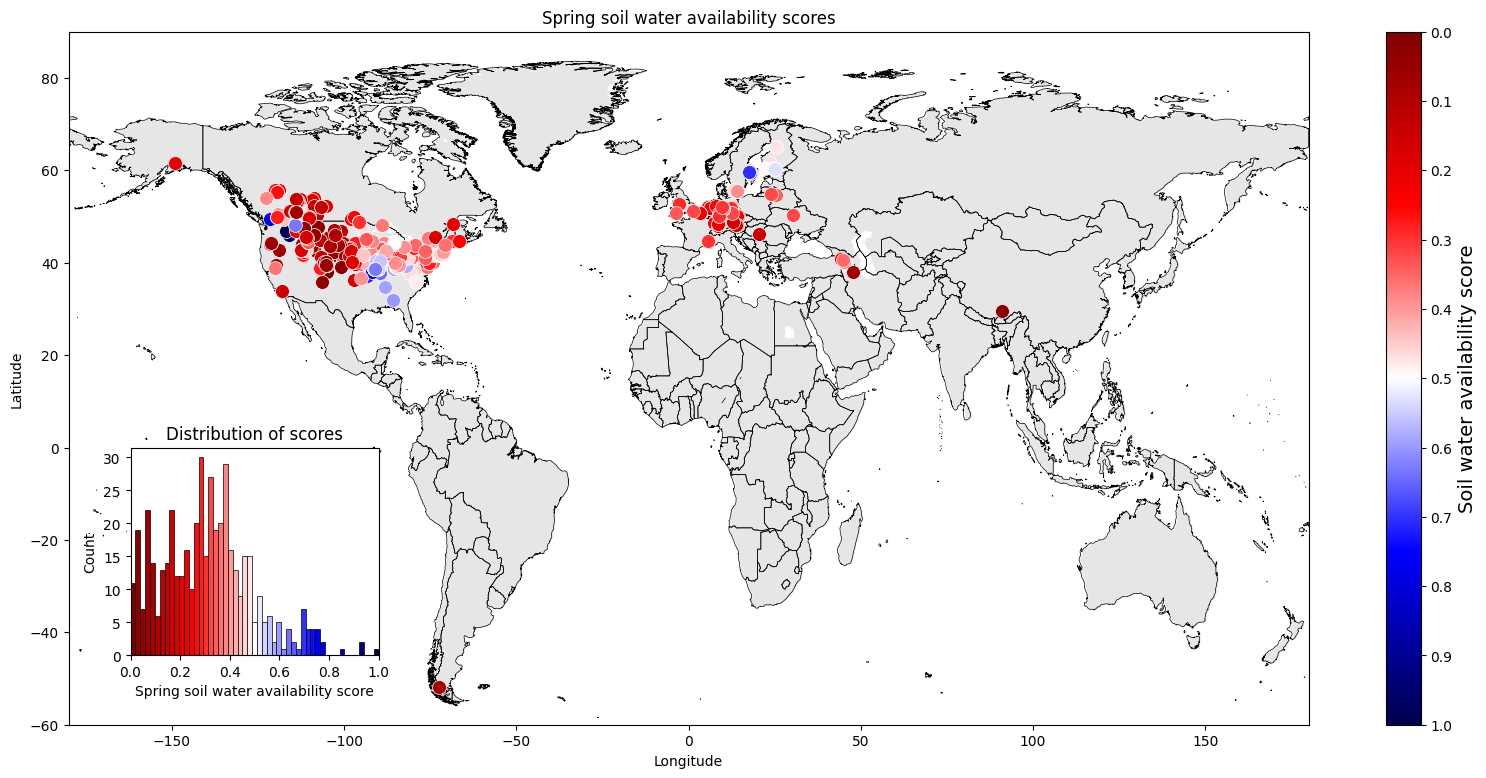

In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from country_parser import load_countries

# load soil water availability scores
df = pd.read_csv('swa_scores.csv')
lats = df['accession_lat'].values
lngs = df['accession_lng'].values
scores = df['spring_soil_moisture'].values

# load global dryland mask
world_mask = ~np.load('dryland_mask.npy')
world_lats = np.linspace(-60, 90, world_mask.shape[0])
world_lngs = np.linspace(-180, 180, world_mask.shape[1])

# load country polygons
country_poly = load_countries('polygons.json')

# initialize figure
fig, ax = plt.subplots(1, 1, figsize=(20, 9))
ax.imshow(world_mask, extent=[-180, 180, -60, 90], vmin=0, vmax=1,
          cmap='gray', aspect='auto', alpha=0.1)

# plot country polygons
for country in country_poly:
    for poly in country_poly[country]:
        plt.plot(poly[:, 1], poly[:, 0], 'k', lw=0.5)

# plot scores
for lat, lng, score in zip(lats, lngs, scores):
    c = matplotlib.colormaps['seismic'](1 - score)
    plt.scatter([lng], [lat], s=100, color=c, edgecolor='w', lw=0.5, alpha=1, zorder=np.inf)

# add colorbar
ticks = np.round(np.linspace(0, 1, 11), 1)
labels = ticks[::-1]
sm = plt.cm.ScalarMappable(cmap='seismic', norm=plt.Normalize(vmin=ticks.min(), vmax=ticks.max()))
sm._A = []
cbar = plt.colorbar(sm, orientation='vertical', ticks=ticks, label='Soil water availability score', ax=ax)
cbar.ax.set_yticklabels(labels)
cbar.ax.yaxis.label.set_fontsize(14)

# add histogram as inset axis
ax_in = ax.inset_axes([0.05, 0.1, 0.2, 0.3]) # x0, y0, width, height
_, _, patches = ax_in.hist(scores, bins=51, edgecolor='k', linewidth=0.5)
for i in range(51):
    patches[i].set_facecolor(matplotlib.colormaps['seismic'](1 - (i / 50)))
ax_in.set_xlim(0, 1)
ax_in.set_xlabel('Spring soil water availability score')
ax_in.set_ylabel('Count')
ax_in.set_title('Distribution of scores')
ax_in.set_facecolor('white')

# finalize plot
plt.xlim([-180, 180])
plt.ylim([-60, 90])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spring soil water availability scores')
plt.show()